# 02. Neural Network Classification with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# Create data to view and fit

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# Make dataframe of features and labels

import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


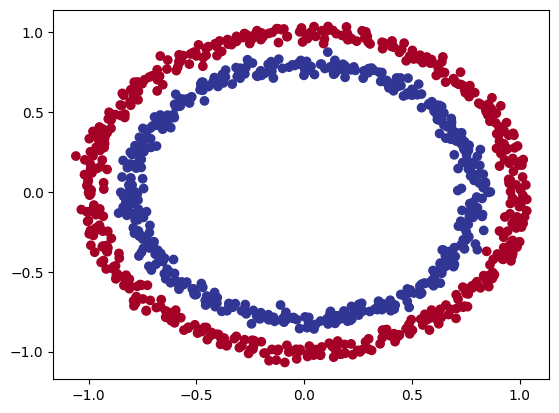

In [6]:
# Plot

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.RdYlBu);

In [7]:
# Shape

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# total samples

len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
# Model

# set random seed

tf.random.set_seed(42)

# model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model

model_1.compile(loss= tf.keras.losses.BinaryFocalCrossentropy(), # when wroking with two classes
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# Fit the model

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 1.8017 - accuracy: 0.4950
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.4820


In [11]:
# Lets try to train it for longer

model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17345525324344635, 0.5]

In [12]:
# Lets add extra layer to improve the performace of the model

# set random seed

tf.random.set_seed(42)

# model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model

model_2.fit(X, y, epochs = 100, verbose = 0)

In [13]:
# Evaluate model_2

model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932870745658875, 0.5]

In [14]:
from re import VERBOSE
# set random seed

tf.random.set_seed(42)

# model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit

model_3.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.4904 - accuracy: 0.4620
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7564 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7140 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 11/

In [15]:
# Lets try to make a model with the activation

# seed

tf.random.set_seed(42)

# model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# compile

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# Fit

model_4.fit(X, y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.8319 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8254 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8255 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8254 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8254 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8253 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8252 - accuracy: 0.4900
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8252 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8251 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.8251 - accuracy: 0.4900
Epoch 11/

In [16]:
# Let try another activation parameter in our model

# Seed

tf.random.set_seed(42)

# model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compile

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit

model_5.fit(X, y, epochs = 100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.8216 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4477 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3557 - accuracy: 0.4340
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2927 - accuracy: 0.4150
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2445 - accuracy: 0.4120
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2053 - accuracy: 0.4220
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1729 - accuracy: 0.4400
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1446 - accuracy: 0.4460
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1203 - accuracy: 0.4510
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.4540
Epoch 11/

In [17]:
# Lets try the activation function with two layers

# seed

tf.random.set_seed(42)

# model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1) # output layer
])

# compile

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics = ["accuracy"])

# Fit

model_6.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.9902 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2870 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1233 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0509 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9985 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9579 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9259 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8998 - accuracy: 0.4600
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8788 - accuracy: 0.4250
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8610 - accuracy: 0.4060
Epoch 11/

In [18]:
# Lets evaluate it

model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.9350


[0.38830602169036865, 0.9350000023841858]

In [19]:


# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [20]:
# Lets evaluate it

model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9960


[0.2033996880054474, 0.9959999918937683]

In [21]:
# Lets split our data in train and test sets to better test our model

# total

len(X)

1000

In [22]:
# split it in test and train sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [23]:
# Lets rebuil our working model

# seed
tf.random.set_seed(42)

# model

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# compile

model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# Fit

model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6908 - accuracy: 0.5063
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5562
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6062
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6338
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6325
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.7038
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7887
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7950
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.7987
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8300
Epoch 11/25
25/25 [

In [24]:
# lets evaluate our model

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9100


[0.22443372011184692, 0.9100000262260437]

In [25]:
# Lets try different evalution metrics

# Lets start with the accuracy

# This is the one the we have used so far

loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set {accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9100
Model loss on test set: 0.22443372011184692
Model accuracy on test set 0.9100000262260437


In [27]:
# Lets try the second one

# Confusion matrix

# we will use the scikit learn confusion matrix

from sklearn.metrics import confusion_matrix

# Make predictions

y_preds = model_8.predict(X_test)

# Create confusion matrix

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [28]:
# this error is comming because our predictions are not in the same format they need to be

In [29]:
# Lets check the predictions

y_preds[:10]

array([[0.8823501 ],
       [0.9621621 ],
       [0.71463764],
       [0.8533368 ],
       [0.06954819],
       [0.00931758],
       [0.9718702 ],
       [0.00260153],
       [0.9239769 ],
       [0.12676375]], dtype=float32)

In [30]:
# lets check our test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [31]:
# So our labels are in binary format and out preds are in prediction probabilites

# so we have to convert them in same format

# lets convert firt 10 and have a look

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [32]:
# this is looking good
# lets try it now

confusion_matrix(y_test, tf.round(y_preds))

array([[85, 16],
       [ 2, 97]])

In [33]:
# So lets try to do some experimentions with the large numbers of data



In [40]:
# import data from the tensor flow

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already stored into the train and test sets

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [37]:


# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [39]:
# check the shapes of the data

train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [42]:
# Lets build a model to do the prediction of the multiclass classification

# seed

tf.random.set_seed(42)

# model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "softmax")
])

# compile the model

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# fit the model

history = model_11.fit(train_data,
                       train_labels,
                       epochs = 10,
                       validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/10
1875/1875 [============

In [43]:
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3165 (12.36 KB)
Trainable params: 3165 (12.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# We need to normalized our data to get the better result

# Check the min and max values of the training data

train_data.min(), train_data.max()

(0, 255)

In [46]:
# Lets convert them into the 0 and 1

# Divide train and test images by the maximun value(normalize it)

train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max of the new data

train_data.min(), train_data.max()

(0.0, 1.0)

In [47]:
# Lets rebuild our model_11 to check the result of the normalized data

# seed

tf.random.set_seed(42)

# model

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile

model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit

norm_history = model_12.fit(
    train_data,
    train_labels,
    epochs = 10,
    validation_data = (test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3371 - accuracy: 0.4523 - val_loss: 1.0575 - val_accuracy: 0.5495
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8809 - accuracy: 0.6588 - val_loss: 0.7714 - val_accuracy: 0.7158
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7018 - accuracy: 0.7482 - val_loss: 0.6961 - val_accuracy: 0.7524
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6493 - accuracy: 0.7711 - val_loss: 0.6556 - val_accuracy: 0.7706
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6236 - accuracy: 0.7824 - val_loss: 0.6443 - val_accuracy: 0.7800
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6039 - accuracy: 0.7919 - val_loss: 0.6229 - val_accuracy: 0.7836
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5910 - accuracy: 0.7969 - val_loss: 0.6149 - val_accuracy:

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

In [48]:
# Lets create a function to plot a random image to its predtion

import random

def plot_random_image(model, images, true_labels, classes):

  # Setup the random integer

  i = random.randint(0, len(images))

  # create preditions and targets

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  # plot the target image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # change the color of the titles depending on if the predictions are right or worng

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


   # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 56ms/step


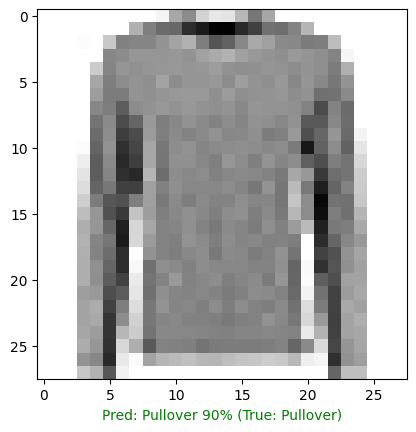

In [52]:
# Check out a random image as well as its prediction
plot_random_image(model=model_12,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [53]:
# Find layers in the model

model_12.layers

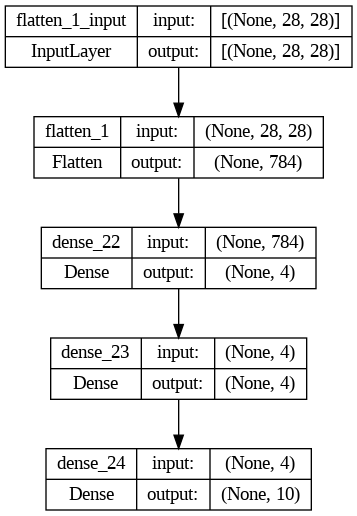

In [54]:

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_12, show_shapes=True)